# Minor Project

## Problem Statement:
To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

## Objective: 
To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above) To analyze the dataset, we will look at the relationship as below:

## Strategy
<ol>
<li>Genre grouping</li>
<li>Game Size analysis</li>
<li>Release date/ Update date factor</li>
<li>Game Price and In-App Purchase Factor (Grouped by Genre)</li>
<li>Age Rating Factor</li> 
</ol>

## Data Cleaning
<ol>
<li>Games without User Rating should be dropped.</li>
<li>Perform Data Preparation by cleaning the data and removing null values.</li>  
<li>Games with less than 200 user rating AND days since last update date $<$ 6 month should be dropped to prevent biased ratings from the developer.</li>
<li>Genre tags "Entertainment" and "Games" are removed from the Genre string as it does not provide meaningful insight.</li>
<li>The remaining of the string are checked and grouped as follows:
<ul>
<li>Puzzle= Puzzle/Board</li>
<li>Adventure= Adventure/Role/Role Playing</li>
<li>Action = Action</li>
<li>Family = Family/Education</li>
</ul>
</li>
<li>State your inferences.</li>
<li>Identify Which genres have higher user ratings.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("appstore_gamespro.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

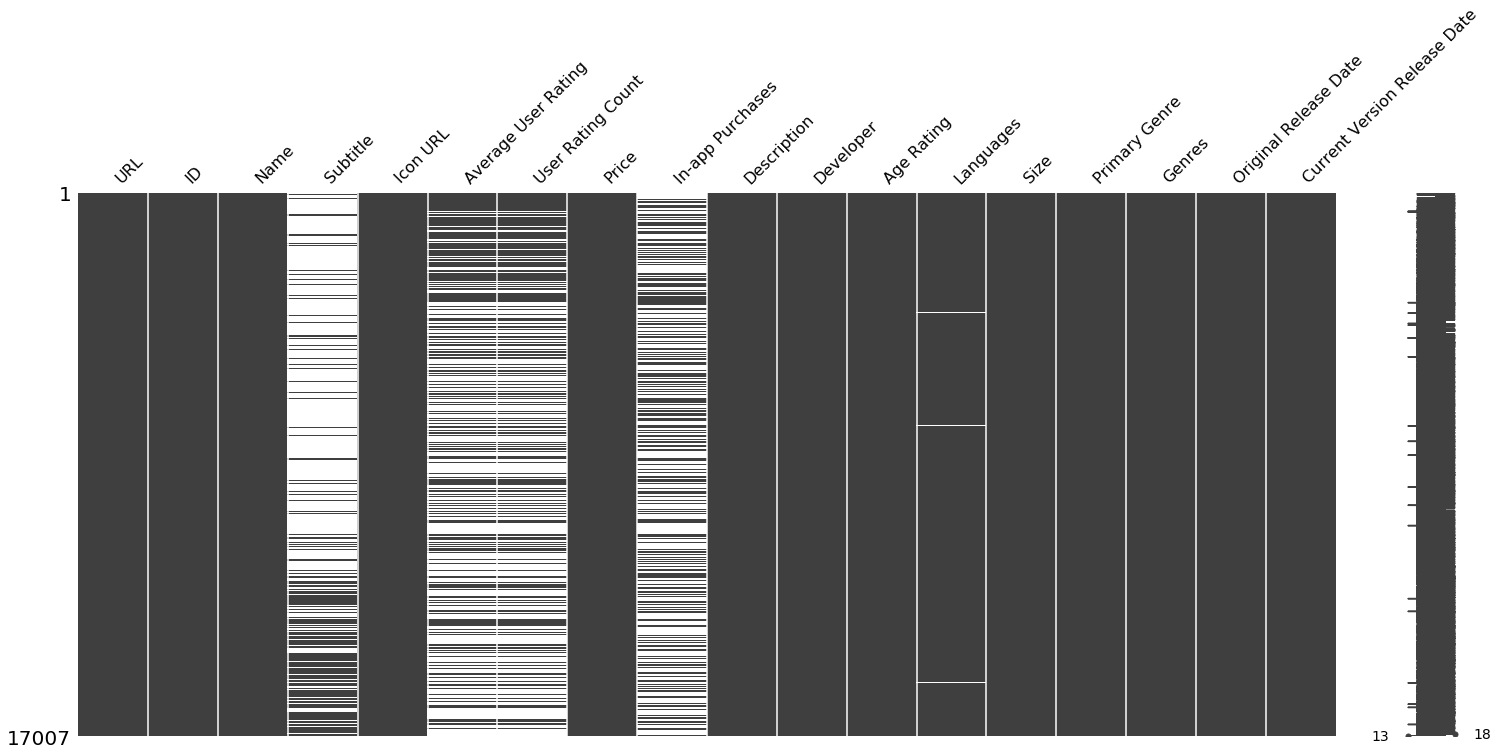

In [4]:
import matplotlib.pyplot as plt
import missingno as msg
msg.matrix(data)
plt.show()

### It seems that dataset is having some missing values

## Cleaning the Data

### we don't have any use with the URL,IconURL,ID,subtitle,developer and description of the games to predict the rating.Thus,removing those columns from the dataset.

In [5]:
data.drop(['Icon URL','URL','ID','Subtitle','Developer','Description'],axis=1,inplace=True)
data.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [6]:
data.columns=data.columns.str.replace(" ","")
data.columns

Index(['Name', 'AverageUserRating', 'UserRatingCount', 'Price',
       'In-appPurchases', 'AgeRating', 'Languages', 'Size', 'PrimaryGenre',
       'Genres', 'OriginalReleaseDate', 'CurrentVersionReleaseDate'],
      dtype='object')

In [7]:
data.isnull().sum()

Name                            0
AverageUserRating            9446
UserRatingCount              9446
Price                          24
In-appPurchases              9324
AgeRating                       0
Languages                      60
Size                            1
PrimaryGenre                    0
Genres                          0
OriginalReleaseDate             0
CurrentVersionReleaseDate       0
dtype: int64

### It seems that UserRatingCount column is  having 9446 null values.Thus,removing those null values from the dataset which satisfies the given condition:Games without user rating to be dropped.

In [8]:
user=(data[data.UserRatingCount.isnull()].index)
data.drop(user,inplace=True)


In [9]:
data['Languages'].value_counts()

EN                                                                    5007
EN, ZH                                                                 134
EN, ZH, ZH                                                             124
EN, DE                                                                  69
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR          64
                                                                      ... 
NL, EN, FR, DE, EL, IT, JA, KO, PT, RU, ZH, ES, SV, TH, TR               1
RU                                                                       1
AR, ZH, EN, FR, DE, HI, ID, IT, JA, KO, PL, PT, RU, SK, ES, TR, VI       1
EN, FR, DE, EL, PT, RU, ZH, ES                                           1
CA, EN, FR, DE, ES                                                       1
Name: Languages, Length: 789, dtype: int64

In [10]:
#Filling the missing values in Languages column using mode of the column (mode('Languages')=EN)
data['Languages'].fillna('EN',inplace=True)
data.isnull().sum()

Name                            0
AverageUserRating               0
UserRatingCount                 0
Price                           0
In-appPurchases              2927
AgeRating                       0
Languages                       0
Size                            0
PrimaryGenre                    0
Genres                          0
OriginalReleaseDate             0
CurrentVersionReleaseDate       0
dtype: int64

In [11]:
np.unique(data['PrimaryGenre'])

array(['Book', 'Business', 'Education', 'Entertainment', 'Finance',
       'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle',
       'Medical', 'Music', 'Navigation', 'News', 'Productivity',
       'Reference', 'Shopping', 'Social Networking', 'Sports', 'Stickers',
       'Travel', 'Utilities'], dtype=object)

In [12]:
data['PrimaryGenre'].value_counts()

Games                7291
Entertainment          92
Education              46
Utilities              44
Sports                 23
Reference              18
Finance                 8
Productivity            8
Book                    5
Lifestyle               4
Health & Fitness        3
Social Networking       3
Stickers                3
Music                   3
Medical                 2
Business                2
News                    2
Travel                  1
Shopping                1
Food & Drink            1
Navigation              1
Name: PrimaryGenre, dtype: int64

### In this Primary Genre,almost it is filled with games and moreover it makes the data single valued so, removing the primary genre from the dataset.

In [13]:
data.drop(['PrimaryGenre'],axis=1,inplace=True)
data.head()

,Name,AverageUserRating,UserRatingCount,Price,In-appPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate
0,Sudoku,4.0,3553.0,2.99,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


### Understanding In-app Purchases

In [14]:
data['In-appPurchases']=data['In-appPurchases'].fillna("0")
data.head(10)

,Name,AverageUserRating,UserRatingCount,Price,In-appPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,Gravitation,2.5,35.0,0.00,0,4+,EN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,Colony,2.5,125.0,0.99,0,4+,EN,64333824.0,"Games, Strategy, Board",3/08/2008,3/10/2018
8,Carte,2.5,44.0,0.00,0,4+,FR,2657280.0,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,4+,EN,1466515.0,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [15]:
def sumofall(inapp):
    for i in range(0,len(inapp)):
        inapp[i] = float(inapp[i])
    return sum(inapp)

In [16]:
data.columns=data.columns.str.replace("-","")
data.InappPurchases=data.InappPurchases.str.replace(",","")
data.InappPurchases = data.InappPurchases.str.split(" ").map(sumofall)
data.head(7)

,Name,AverageUserRating,UserRatingCount,Price,InappPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate
0,Sudoku,4.0,3553.0,2.99,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,0.00,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,0.00,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,0.00,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,4+,EN,48672768.0,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,Gravitation,2.5,35.0,0.00,0.00,4+,EN,6328320.0,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013


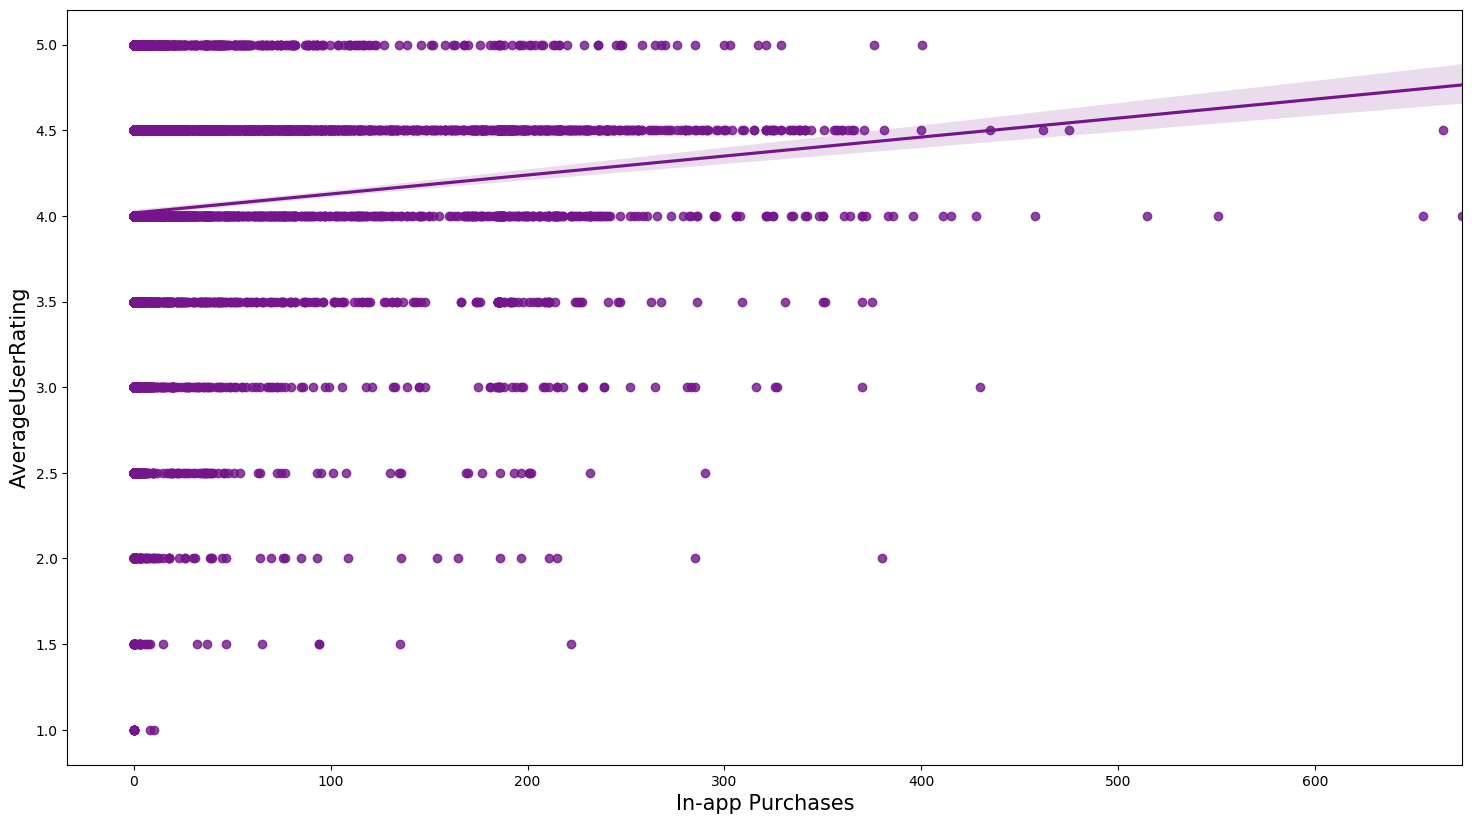

In [17]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(18,10),dpi=100)
ax = sns.regplot(data=data, x='InappPurchases', y='AverageUserRating', color = '#74158c')
ax.set_ylabel('AverageUserRating', fontsize = 15)
ax.set_xlabel('In-app Purchases', fontsize = 15)
plt.show()

### Configuring the datatype of OriginalReleaseDate and CurrentVersionReleaseDate and calculating the timegap of the apps such that the latest released date of the app can be known.

In [18]:
import datetime
data['OriginalReleaseDate']=data['OriginalReleaseDate'].astype(str).str.replace("/","-")
data['CurrentVersionReleaseDate']=data['CurrentVersionReleaseDate'].astype(str).str.replace("/","-")
data['OriginalReleaseDate']=pd.to_datetime(data['OriginalReleaseDate'],dayfirst=True)
data['CurrentVersionReleaseDate']=pd.to_datetime(data['CurrentVersionReleaseDate'],dayfirst=True)
present_date=max(data['CurrentVersionReleaseDate'])
data['days_since_last_updated']=data['CurrentVersionReleaseDate']
print("present date:",present_date)

present date: 2019-08-03 00:00:00


In [19]:
data['days_since_last_updated']=data['days_since_last_updated'].map(lambda x:present_date-x)
data['days_since_last_updated']=data['days_since_last_updated'].map(lambda x:x.days)
data.head()

,Name,AverageUserRating,UserRatingCount,Price,InappPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate,days_since_last_updated
0,Sudoku,4.0,3553.0,2.99,0.0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,795
1,Reversi,3.5,284.0,1.99,0.0,4+,EN,12328960.0,"Games, Strategy, Board",2008-07-11,2018-05-17,443
2,Morocco,3.0,8376.0,0.00,0.0,4+,EN,674816.0,"Games, Board, Strategy",2008-07-11,2017-09-05,697
3,Sudoku (Free),3.5,190394.0,0.00,0.0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,795
4,Senet Deluxe,3.5,28.0,2.99,0.0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,377


### Games with less than 200 user rating and days since last update date $<$ 6 month should be dropped to prevent biased ratings from the developer

In [20]:
data.drop(data[(data['UserRatingCount'] < 200) & (data['days_since_last_updated'] < 180)].index,axis=0,inplace=True)
data.head(7)

,Name,AverageUserRating,UserRatingCount,Price,InappPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate,days_since_last_updated
0,Sudoku,4.0,3553.0,2.99,0.0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,795
1,Reversi,3.5,284.0,1.99,0.0,4+,EN,12328960.0,"Games, Strategy, Board",2008-07-11,2018-05-17,443
2,Morocco,3.0,8376.0,0.00,0.0,4+,EN,674816.0,"Games, Board, Strategy",2008-07-11,2017-09-05,697
3,Sudoku (Free),3.5,190394.0,0.00,0.0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,795
4,Senet Deluxe,3.5,28.0,2.99,0.0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,377
6,Gravitation,2.5,35.0,0.00,0.0,4+,EN,6328320.0,"Games, Entertainment, Puzzle, Strategy",2008-07-30,2013-11-14,2088
7,Colony,2.5,125.0,0.99,0.0,4+,EN,64333824.0,"Games, Strategy, Board",2008-08-03,2018-10-03,304


## Extracting the number of languages supported from Languages column

In [21]:
data['no_of_lang'] = data['Languages']
data['no_of_lang'] = data['no_of_lang'].str.replace(",","")
data['no_of_lang'] = data['no_of_lang'].str.replace(" ","")
data['no_of_lang'] = data['no_of_lang'].map(lambda x: len(x)//2)

In [22]:
data.head()

,Name,AverageUserRating,UserRatingCount,Price,InappPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate,days_since_last_updated,no_of_lang
0,Sudoku,4.0,3553.0,2.99,0.0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,795,17
1,Reversi,3.5,284.0,1.99,0.0,4+,EN,12328960.0,"Games, Strategy, Board",2008-07-11,2018-05-17,443,1
2,Morocco,3.0,8376.0,0.00,0.0,4+,EN,674816.0,"Games, Board, Strategy",2008-07-11,2017-09-05,697,1
3,Sudoku (Free),3.5,190394.0,0.00,0.0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,795,17
4,Senet Deluxe,3.5,28.0,2.99,0.0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,377,15


### Plotting Number of Languages against Average User Rating


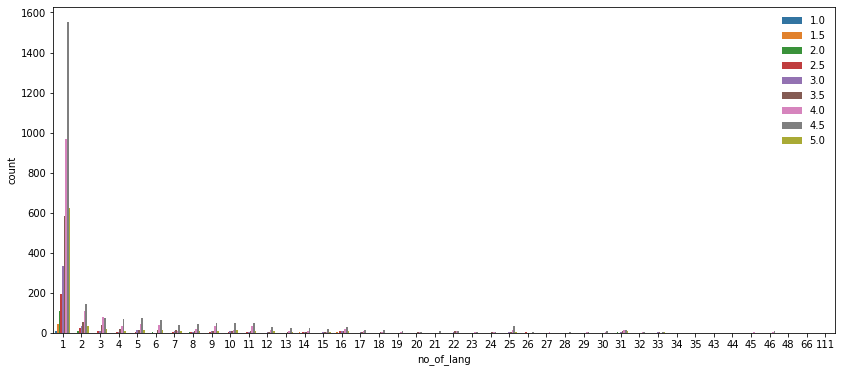

In [23]:
plt.figure(figsize=(14,6))
lang = sns.countplot(x='no_of_lang',hue='AverageUserRating',data=data)
lang.legend(loc='upper right', frameon=False)
plt.show()

### Most of the apps support only one Language-EN(English)

## Genre Grouping<br>

In [24]:
data.Genres.value_counts()

Games, Strategy, Puzzle                     242
Games, Strategy, Simulation                 241
Games, Simulation, Strategy                 232
Games, Strategy, Action                     225
Games, Puzzle, Strategy                     190
                                           ... 
Games, Strategy, Utilities, Adventure         1
Lifestyle, Games, Strategy, Board             1
Business, Games, Strategy                     1
Entertainment, Strategy, Casual, Games        1
Games, Strategy, Lifestyle, Role Playing      1
Name: Genres, Length: 560, dtype: int64

In [25]:
#Removing the Games,and Entertainment Genres  
data['Genres']=data['Genres'].str.replace(",","")
data['Genres']=data['Genres'].str.replace("Games","")
data['Genres']=data['Genres'].str.replace("Entertainment","")

In [26]:
tag = data[~data.Genres.str.contains('Adventure')&
             ~data.Genres.str.contains('Board')&
             ~data.Genres.str.contains('Action')&
             ~data.Genres.str.contains('Puzzle')&
             ~data.Genres.str.contains('Role')& 
             ~data.Genres.str.contains('Role Playing')&
             ~data.Genres.str.contains('Family')& 
             ~data.Genres.str.contains('Education')].index

data.drop(tag,inplace=True)
data.head(20)

,Name,AverageUserRating,UserRatingCount,Price,InappPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate,days_since_last_updated,no_of_lang
0,Sudoku,4.0,3553.0,2.99,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Strategy Puzzle,2008-07-11,2017-05-30,795,17
1,Reversi,3.5,284.0,1.99,0.00,4+,EN,12328960.0,Strategy Board,2008-07-11,2018-05-17,443,1
2,Morocco,3.0,8376.0,0.00,0.00,4+,EN,674816.0,Board Strategy,2008-07-11,2017-09-05,697,1
3,Sudoku (Free),3.5,190394.0,0.00,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Strategy Puzzle,2008-07-23,2017-05-30,795,17
4,Senet Deluxe,3.5,28.0,2.99,0.00,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Strategy Board Education,2008-07-18,2018-07-22,377,15
6,Gravitation,2.5,35.0,0.00,0.00,4+,EN,6328320.0,Puzzle Strategy,2008-07-30,2013-11-14,2088,1
7,Colony,2.5,125.0,0.99,0.00,4+,EN,64333824.0,Strategy Board,2008-08-03,2018-10-03,304,1
8,Carte,2.5,44.0,0.00,0.00,4+,FR,2657280.0,Strategy Board,2008-08-03,2017-11-23,618,1
11,Lumen Lite,3.5,5072.0,0.00,0.00,4+,EN,7086403.0,Puzzle Strategy,2008-08-18,2008-11-22,3906,1
13,Marple,3.5,989.0,0.99,0.00,4+,EN,3643392.0,Puzzle Strategy,2008-08-28,2019-05-05,90,1


In [27]:
data.loc[data['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle'
data.loc[data['Genres'].str.contains('Board'),'Genres'] = 'Puzzle'
data.loc[data['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
data.loc[data['Genres'].str.contains('Role'),'Genres'] = 'Adventure'
data.loc[data['Genres'].str.contains('Role Playing'),'Genres'] = 'Adventure'
data.loc[data['Genres'].str.contains('Action'),'Genres'] = 'Action'
data.loc[data['Genres'].str.contains('Family'),'Genres'] = 'Family'
data.loc[data['Genres'].str.contains('Education'),'Genres'] = 'Family'

data.head(20)

,Name,AverageUserRating,UserRatingCount,Price,InappPurchases,AgeRating,Languages,Size,Genres,OriginalReleaseDate,CurrentVersionReleaseDate,days_since_last_updated,no_of_lang
0,Sudoku,4.0,3553.0,2.99,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Puzzle,2008-07-11,2017-05-30,795,17
1,Reversi,3.5,284.0,1.99,0.00,4+,EN,12328960.0,Puzzle,2008-07-11,2018-05-17,443,1
2,Morocco,3.0,8376.0,0.00,0.00,4+,EN,674816.0,Puzzle,2008-07-11,2017-09-05,697,1
3,Sudoku (Free),3.5,190394.0,0.00,0.00,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Puzzle,2008-07-23,2017-05-30,795,17
4,Senet Deluxe,3.5,28.0,2.99,0.00,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Puzzle,2008-07-18,2018-07-22,377,15
6,Gravitation,2.5,35.0,0.00,0.00,4+,EN,6328320.0,Puzzle,2008-07-30,2013-11-14,2088,1
7,Colony,2.5,125.0,0.99,0.00,4+,EN,64333824.0,Puzzle,2008-08-03,2018-10-03,304,1
8,Carte,2.5,44.0,0.00,0.00,4+,FR,2657280.0,Puzzle,2008-08-03,2017-11-23,618,1
11,Lumen Lite,3.5,5072.0,0.00,0.00,4+,EN,7086403.0,Puzzle,2008-08-18,2008-11-22,3906,1
13,Marple,3.5,989.0,0.99,0.00,4+,EN,3643392.0,Puzzle,2008-08-28,2019-05-05,90,1


#### From the above we can see that the remaining of the strings are checked and grouped as follows:
<li>Puzzle= Puzzle/Board</li>
</li>Adventure= Adventure/Role/Role Playing</li>
<li>Action = Action</li>
<li>Family = Family/Education</li>

In [28]:
data.Genres.value_counts()

Puzzle       1962
Adventure    1019
Action        908
Family        357
Name: Genres, dtype: int64

### Finding which genre has the highest User Rating

In [29]:
mPuzzle = data.AverageUserRating[(data['Genres']=='Puzzle')].mean()
mPuzzle

4.02420998980632

In [30]:
mAdventure = data.AverageUserRating[(data['Genres']=='Adventure')].mean()
mAdventure

4.048577036310108

In [31]:
mAction = data.AverageUserRating[(data['Genres']=='Action')].mean()
mAction

4.108480176211454

In [32]:
mFamily = data.AverageUserRating[(data['Genres']=='Family')].mean()
mFamily

4.135854341736695

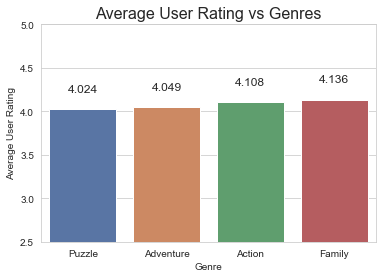

In [33]:
sns.set_style('whitegrid')
x=['Puzzle','Adventure','Action','Family']
y = [mPuzzle,\
     mAdventure,\
     mAction,\
     mFamily]

datavis= sns.barplot(x,y,palette='deep')
datavis.set(xlabel='Genre',ylabel='Average User Rating')
datavis.set(ylim=(2.5,5))
datavis.set_title('Average User Rating vs Genres',fontsize=16)

for d in datavis.patches:
             datavis.annotate("%.3f" % d.get_height(), (d.get_x() + d.get_width() / 2., d.get_height()),
                 ha='center', va='center', fontsize=12,  xytext=(0, 20),
                 textcoords='offset points')
plt.show()

#### From the above plot we can say that Puzzle genre has the highest user rating.<br>

## Game size Analysis

In [34]:
print("Maximum App Size",np.max(data['Size'].dropna())/1000000,"MB")
print("Minimum App Size",np.min(data['Size'].dropna())/1000000,"MB")

Maximum App Size 3747.74272 MB
Minimum App Size 0.21584 MB


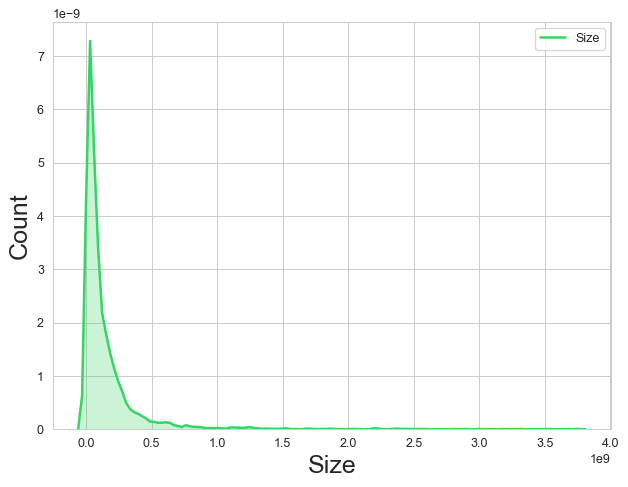

In [35]:
plt.figure(figsize=(8,6),dpi=90)
siz = sns.kdeplot(data['Size'], shade = True, linewidth = 2, color = '#33d662')
siz.set_ylabel('Count', fontsize = 20)
siz.set_xlabel('Size', fontsize = 20)
plt.show()

### From the above plot it seems that most of the apps fall in the region 0-500 MB.

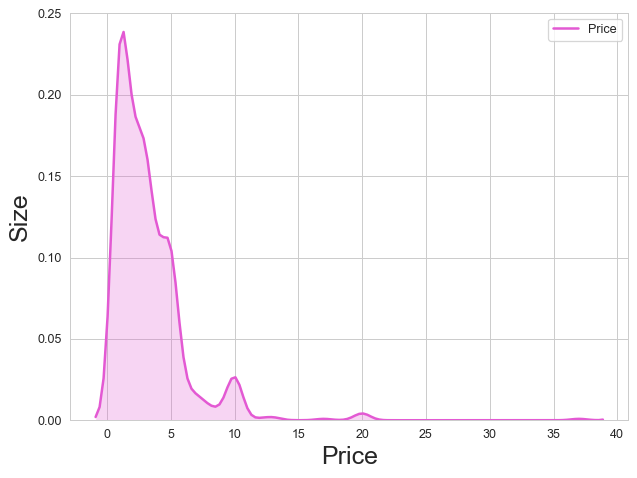

In [36]:
plt.figure(figsize=(8,6),dpi=90)
df = data[data['Price'] > 0.0]
price = sns.kdeplot(df['Price'], shade=True, color = '#e359d3', linewidth=2 )
price.set_ylabel('Size', fontsize = 20)
price.set_xlabel('Price', fontsize = 20)
plt.show()

### The above plot gives the inference that the apps with size nearly 200-250 MB should be of least price to get the good User rating.

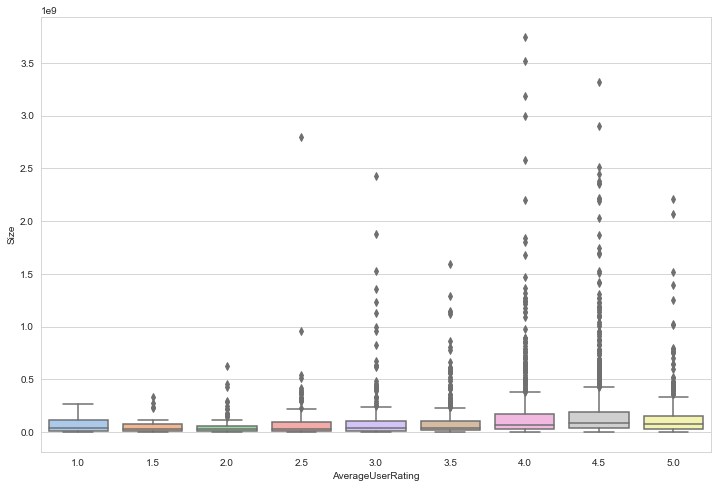

In [38]:
data1=data.copy()
plt.figure(figsize=(12,8))
siz = sns.boxplot(data=data1,y="Size",x="AverageUserRating",palette=sns.color_palette("pastel"))
plt.show()

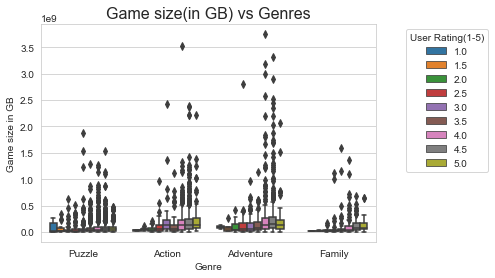

In [39]:
h, axes = figure= (10,12)

datavis1 = sns.boxplot(y=data.Size, x=data.Genres, data=data,hue=data.AverageUserRating, dodge=1)


datavis1.set(xlabel='Genre',ylabel='Game size in GB')


datavis1.set_title('Game size(in GB) vs Genres',fontsize=16)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.35, 1))

plt.show()

## Age Rating

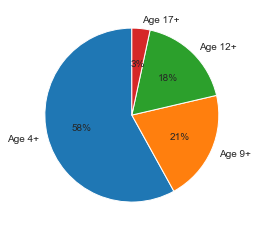

In [40]:
agerating = [data1.AgeRating[(data1['AgeRating']=='4+')].count(),data1.AgeRating[(data1['AgeRating']=='9+')].count(),\
     data1.AgeRating[(data1['AgeRating']=='12+')].count(),data1.AgeRating[(data1['AgeRating']=='17+')].count()]
rating= ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(agerating, labels=rating, startangle=90, autopct='%1.0f%%')
plt.show()


### Nearly 60% of the apps are 4+ rated.

<Figure size 864x576 with 0 Axes>

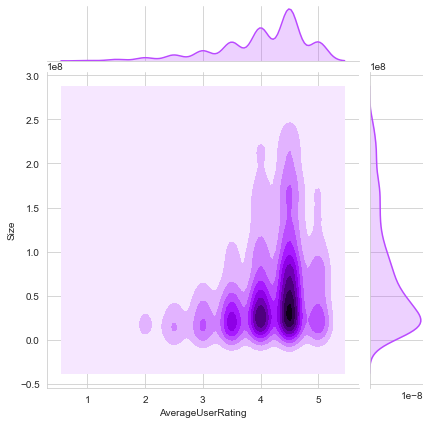

In [41]:
#Density Wise Distribution 
plt.figure(figsize=(12,8))
siz = sns.jointplot(data=data[data['Size'] < 250000000], kind="kde" ,y="Size",x="AverageUserRating",color="#ba4aff")
plt.show()

### INFERENCES:
1.It is clear that the Family genre give the highest user rating.<br><br>
2.Irrespective of any Genre,the size of the games should be between 0-250MB to good rating i.e.,4+.<br><br>
3.Size of games in Action Genre should be maintained from 500MB to 1500MB to achieve 4+ rating.<br><br>
4.For Genre like Adventure,the size of the game should be within 600MB to 2500MB and if needed it can be extended to 3600MB to get 4+ rating.<br><br>
5.To achieve good user rating,the Family genre games should not be extended greater than 600MB of size.<br><br>
5.For Genre like Puzzle it's better not to extend the size of the above 1500MB to get good rating.<br><br>
6.To achieve a good user rating of 4+,the game price should be within($0-$10) for the games with size 0-250MB.<br><br>
7.Irrespective of any Genre,the games with 4+ AgeRating gives good user rating.<br><br>
8.Overall for getting good user rating of 4+,the app size should not extend 2500MB.
